In [31]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
#from wordcloud import WordCloud, ImageColorGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

tnews = fetch_20newsgroups(subset="train", remove=('headers', 'footers', 'quotes'))

In [2]:
print("DESCR: ", tnews.DESCR)

DESCR:  .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimens

In [3]:
print("keys: ", tnews.keys())
print("target_names: ", list(tnews.target_names))
print("target: ", list(tnews.target))
print("filenames: ", tnews.filenames[1])
print("Ex: ", tnews.data[1])


keys:  dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
target_names:  ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
target:  [7, 4, 4, 1, 14, 16, 13, 3, 2, 4, 8, 19, 4, 14, 6, 0, 1, 7, 12, 5, 0, 10, 6, 2, 4, 1, 12, 9, 15, 7, 6, 13, 12, 17, 18, 10, 8, 11, 8, 16, 9, 4, 3, 9, 9, 4, 4, 8, 12, 14, 5, 15, 2, 13, 17, 11, 7, 10, 2, 14, 12, 5, 4, 6, 7, 0, 11, 16, 0, 6, 17, 7, 12, 7, 3, 12, 11, 7, 2, 2, 0, 16, 1, 2, 7, 3, 2, 1, 10, 12, 12, 17, 12, 2, 8, 8, 18, 5, 0, 1, 6, 12, 8, 4, 17, 12, 12, 12, 1, 6, 18, 4, 3, 10, 9, 0, 13, 11, 5, 14, 15, 8, 4, 15, 15, 1, 0, 16, 9, 8, 6, 13, 6, 17, 14, 0, 9, 1, 2, 15, 13, 9, 2, 8, 2, 13, 2, 0, 15, 

$\textit{TFIDF}$

In [22]:
cv1 = TfidfVectorizer(ngram_range=(1,1), stop_words="english")

vectorization1 = cv1.fit_transform(tnews.data)
vocabulary1 = cv1.get_feature_names_out()

print(f'El tamaño del vocabulario es {len(cv1.get_feature_names_out())}')
print(vectorization1)

El tamaño del vocabulario es 101322
  (0, 59071)	0.10043853867312116
  (0, 57250)	0.1063473585616558
  (0, 41874)	0.224548896412017
  (0, 49800)	0.11869932893481257
  (0, 46690)	0.12504220873599214
  (0, 73174)	0.16142029533900565
  (0, 99608)	0.09418459052541318
  (0, 84050)	0.16329311028814825
  (0, 37208)	0.1434127293323407
  (0, 62594)	0.13037295035007848
  (0, 87913)	0.25808578247347563
  (0, 54493)	0.06961997844491917
  (0, 23430)	0.12937103288512333
  (0, 77676)	0.12197186951739486
  (0, 81450)	0.1461308934288897
  (0, 24583)	0.19644480500804062
  (0, 16806)	0.1407774554706102
  (0, 83208)	0.11339406589538423
  (0, 76269)	0.08978258481915573
  (0, 34742)	0.17300821242559045
  (0, 24108)	0.24723134514216435
  (0, 25437)	0.10548299054214269
  (0, 11174)	0.20599311323287353
  (0, 35902)	0.1266709604197344
  (0, 9843)	0.20797700857530224
  :	:
  (11313, 26147)	0.20175864211559685
  (11313, 61823)	0.16955626387349407
  (11313, 84379)	0.18617786993161733
  (11313, 87500)	0.20399527693

$\textit{Count Vectorizer}$

In [23]:
cv2 = CountVectorizer(ngram_range=(1,1), max_features=None, stop_words="english")

vectorization2 = cv2.fit_transform(tnews.data)
vocabulary2 = cv2.get_feature_names_out()

print(f'El tamaño del vocabulario es {len(cv2.get_feature_names_out())}')
print(type(vectorization2))

El tamaño del vocabulario es 101322
<class 'scipy.sparse._csr.csr_matrix'>


In [27]:
# Hacemos un diccionario para agrupar los articulos por categoria
articles_by_category = {}
indexes_by_category = {}
matriz_similaridad = cosine_similarity(vectorization1)

for i, category in enumerate(tnews.target_names):
    category_articles = np.array([[tnews.data[j], j] for j in range(len(tnews.data)) if tnews.target[j] == i])
    articles_by_category[category] = category_articles

reference_article = int(random.choice(articles_by_category['sci.electronics'][..., 1]))

same_category_similarity = [matriz_similaridad[reference_article, int(j)] for j in articles_by_category['sci.electronics'][..., 1] if int(j) != reference_article]
diff_category_similarity = [matriz_similaridad[reference_article, j] for j in range(matriz_similaridad.shape[0]) if j not in articles_by_category['sci.electronics'][..., 1]]

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_14280\858133095.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  diff_category_similarity = [matriz_similaridad[reference_article, j] for j in range(matriz_similaridad.shape[0]) if j not in articles_by_category['sci.electronics'][..., 1]]


In [33]:
model = NearestNeighbors(n_neighbors=10,
                         metric='cosine',
                         algorithm='brute',
                         n_jobs=-1)
model.fit(vectors1)
model.

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=10)

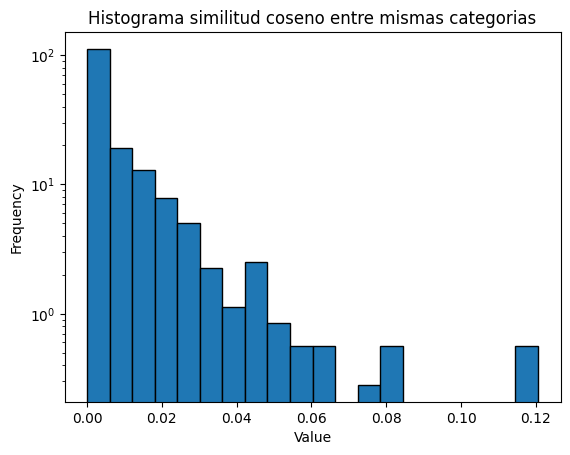

In [28]:
plt.hist(same_category_similarity, edgecolor='black', bins=20, density=True, log=True)

plt.xlabel('Value')
plt.ylabel('Frequency')

plt.title('Histograma similitud coseno entre mismas categorias')
plt.show()

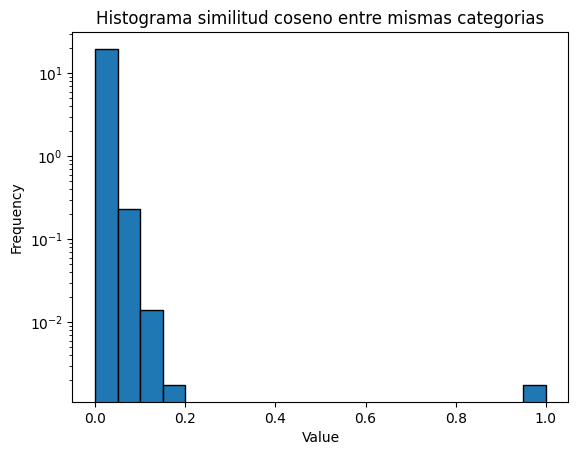

In [29]:
plt.hist(diff_category_similarity, edgecolor='black', bins=20, density=True, log=True)
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.title('Histograma similitud coseno entre mismas categorias')
plt.show()

$\textit{Ahora con TSVD}$

In [35]:
svd = TruncatedSVD(n_components=32)
svd.fit(vectors1)
transformed = svd.transform(vectors1)
transformed.shape

(11314, 32)

In [ ]:
doc_freq = np.array(vectors1.astype(bool).sum(axis=0)).flatten()
plt.hist(doc_freq, bins=100, log=True)
plt.show()